In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler

In [2]:
waste_data = pd.read_csv("Plastic Waste Around the World.csv")

waste_data.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [3]:
waste_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


In [4]:
waste_data[waste_data['Country'] == 'Nigeria'].value_counts()

Country  Total_Plastic_Waste_MT  Main_Sources        Recycling_Rate  Per_Capita_Waste_KG  Coastal_Waste_Risk
Nigeria  1.53                    Consumer_Packaging  2.1             7.3                  High                  1
Name: count, dtype: int64

In [5]:
waste_data.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,165.000000,165.000000,165.000000
mean,1.723515,13.096364,122.255152
std,6.001944,16.687354,222.849695
min,0.010000,0.100000,2.600000
25%,0.120000,1.200000,17.300000
50%,0.510000,5.400000,54.900000
75%,1.330000,16.400000,127.500000
max,59.080000,84.800000,1564.400000


In [6]:
waste_data["Coastal_Waste_Risk"].value_counts()

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

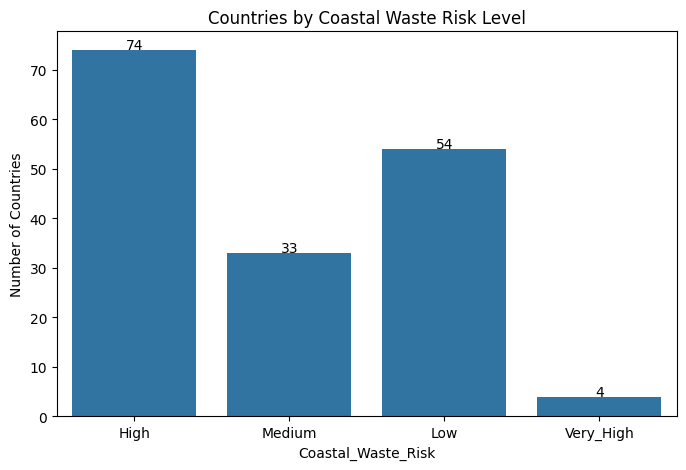

In [7]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=waste_data, x="Coastal_Waste_Risk")

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

plt.title("Countries by Coastal Waste Risk Level")
plt.ylabel("Number of Countries")
plt.show()

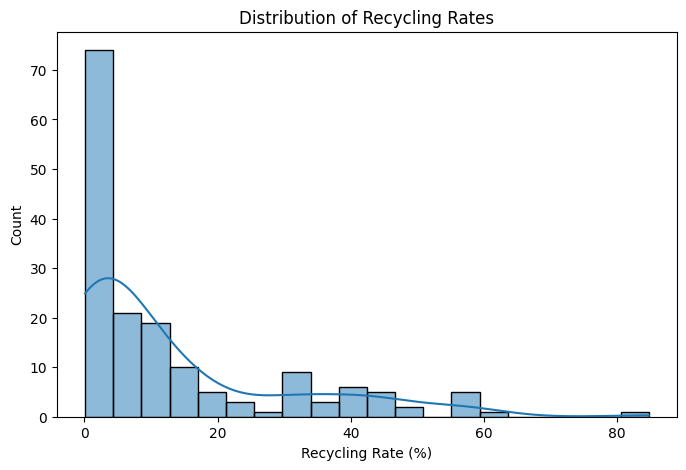

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(waste_data["Recycling_Rate"], bins=20, kde=True)
plt.title("Distribution of Recycling Rates")
plt.xlabel("Recycling Rate (%)")
plt.show()

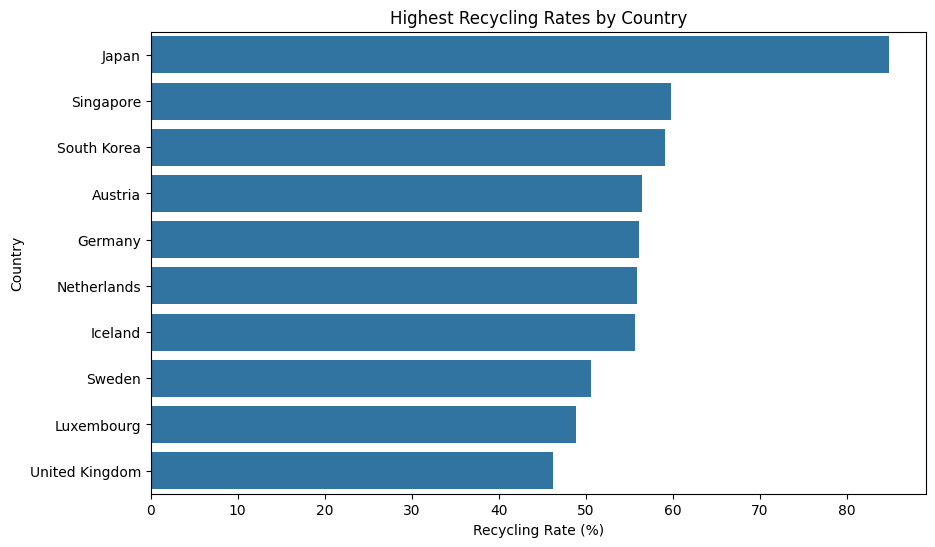

In [9]:
# Top 10 countries with highest recycling rates
high_recycle = waste_data.sort_values(
    "Recycling_Rate", ascending=False
).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=high_recycle,
            x="Recycling_Rate",
            y="Country")
plt.title("Highest Recycling Rates by Country")
plt.xlabel("Recycling Rate (%)")
plt.show()

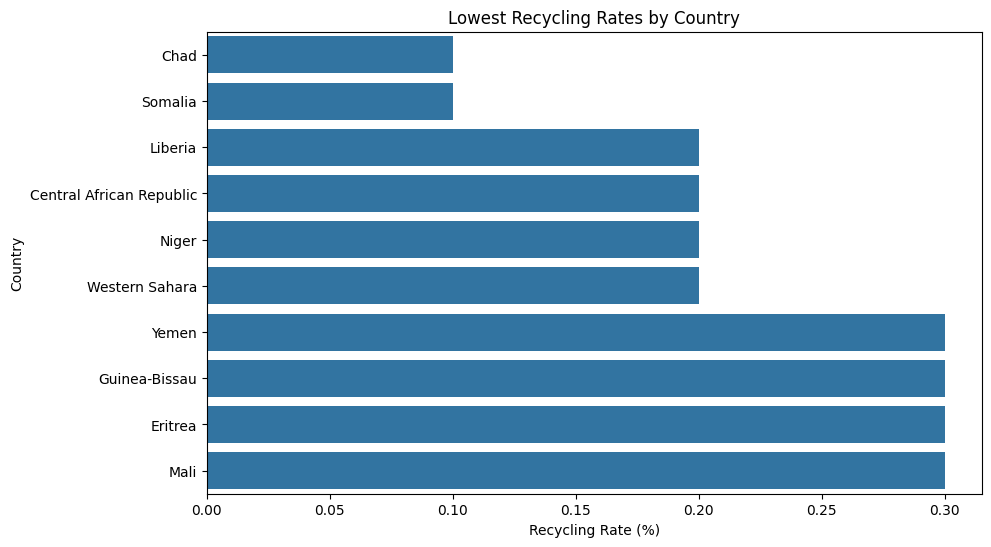

In [10]:
low_recycle = waste_data.sort_values(
    "Recycling_Rate", ascending=True
).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=low_recycle,
            x="Recycling_Rate",
            y="Country")
plt.title("Lowest Recycling Rates by Country")
plt.xlabel("Recycling Rate (%)")
plt.show()


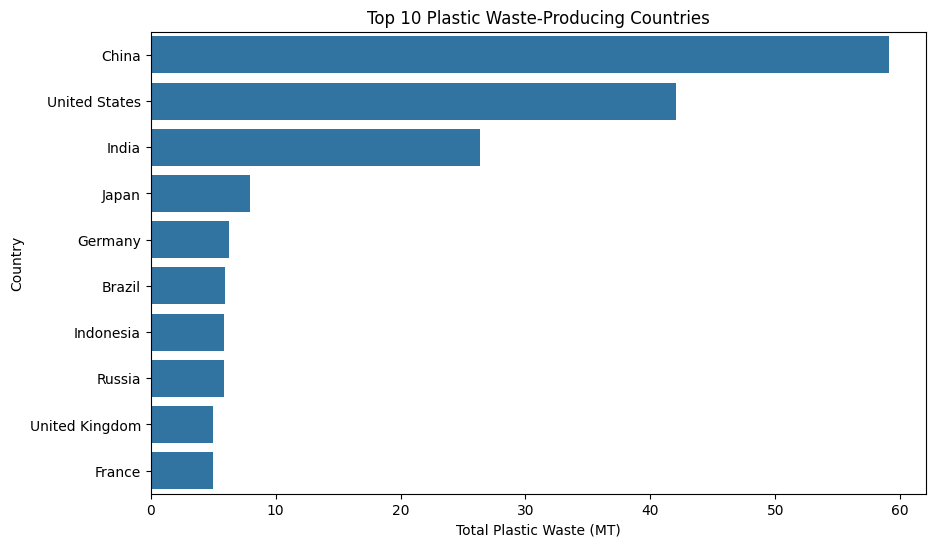

In [11]:
top10_waste = waste_data.sort_values(
    "Total_Plastic_Waste_MT", ascending=False
).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_waste,
            x="Total_Plastic_Waste_MT",
            y="Country")
plt.title("Top 10 Plastic Waste-Producing Countries")
plt.xlabel("Total Plastic Waste (MT)")
plt.show()


In [12]:
top10_waste = waste_data.sort_values(
    "Total_Plastic_Waste_MT", ascending=False
).head(10)

In [13]:
top10_waste

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,Medium
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High
7,Russia,5.84,Industrial_Consumer,5.6,40.2,Medium
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,Low
9,France,4.98,Packaging_Consumer,27.3,73.1,Low


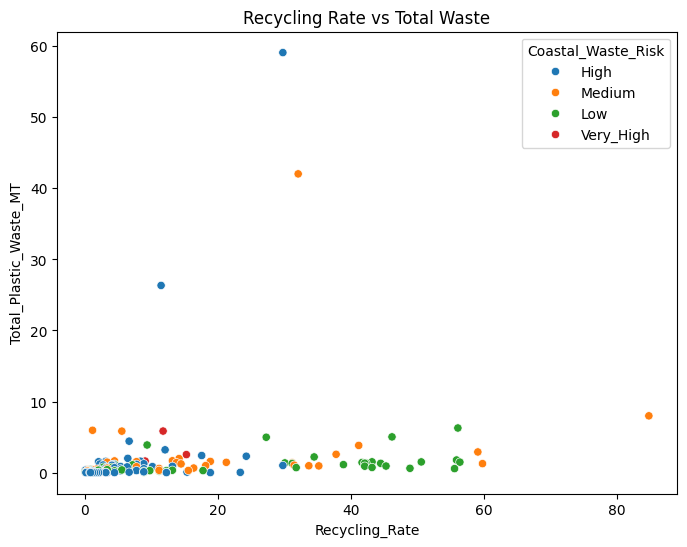

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=waste_data,
    x="Recycling_Rate",
    y="Total_Plastic_Waste_MT",
    hue="Coastal_Waste_Risk"
)
plt.title("Recycling Rate vs Total Waste")
plt.show()


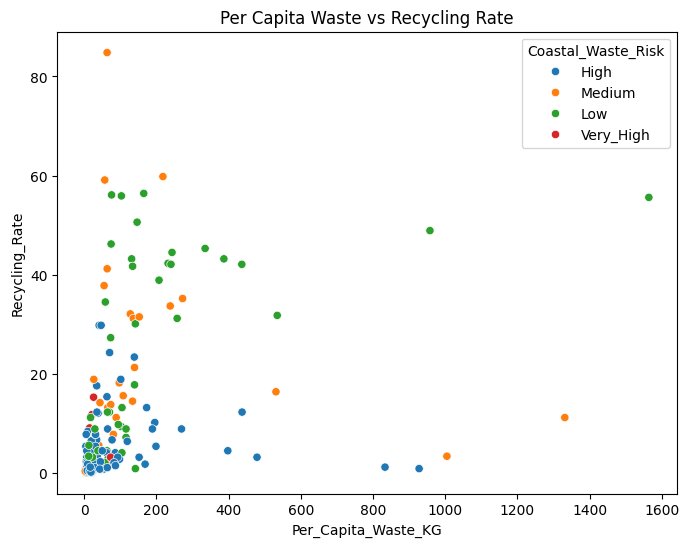

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=waste_data,
    x="Per_Capita_Waste_KG",
    y="Recycling_Rate",
    hue="Coastal_Waste_Risk"
)
plt.title("Per Capita Waste vs Recycling Rate")
plt.show()

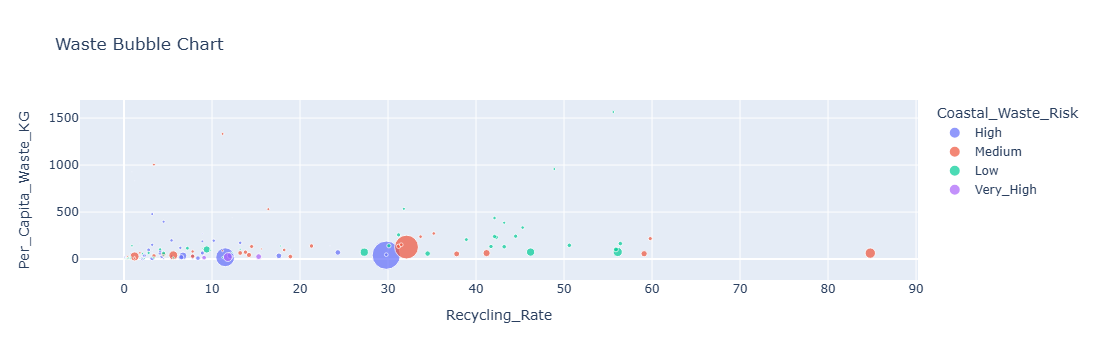

In [16]:
fig = px.scatter(
    waste_data,
    x="Recycling_Rate",
    y="Per_Capita_Waste_KG",
    size="Total_Plastic_Waste_MT",
    color="Coastal_Waste_Risk",
    hover_name="Country",
    title="Waste Bubble Chart"
)

fig.show()

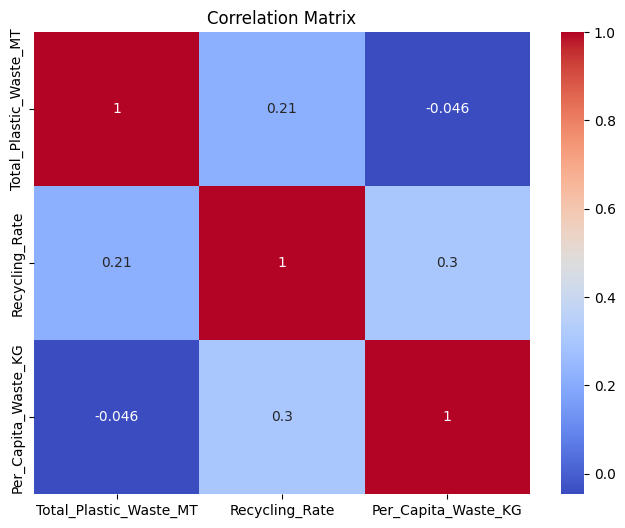

In [17]:
plt.figure(figsize=(8,6))

sns.heatmap(
    waste_data[["Total_Plastic_Waste_MT",
                "Recycling_Rate",
                "Per_Capita_Waste_KG"]].corr(),
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Matrix")
plt.show()


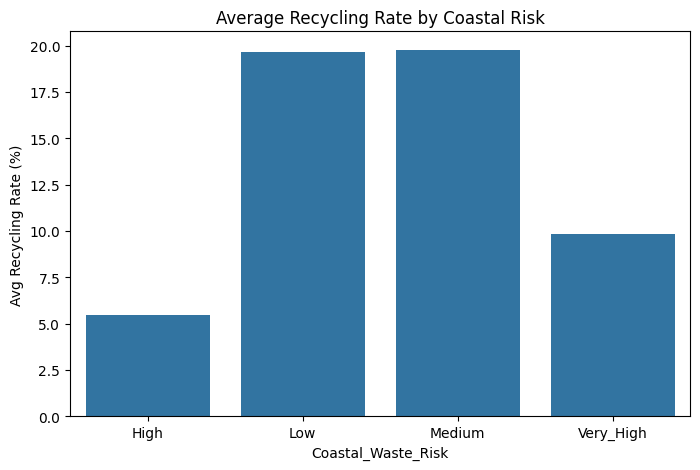

In [18]:
risk_group = waste_data.groupby(
    "Coastal_Waste_Risk"
)["Recycling_Rate"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=risk_group,
            x="Coastal_Waste_Risk",
            y="Recycling_Rate")
plt.title("Average Recycling Rate by Coastal Risk")
plt.ylabel("Avg Recycling Rate (%)")
plt.show()


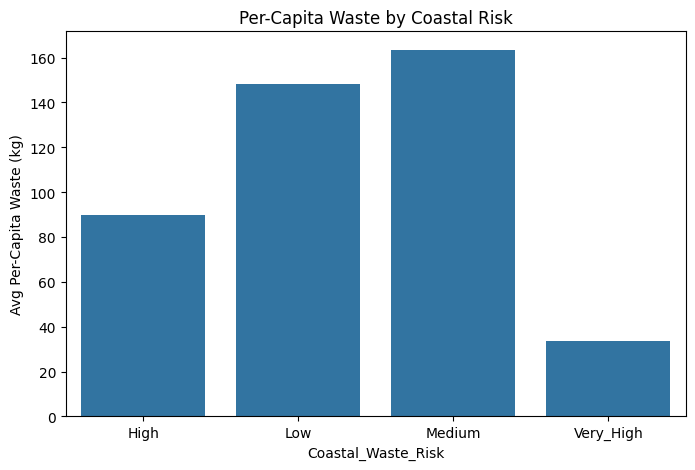

In [19]:
risk_pc = waste_data.groupby(
    "Coastal_Waste_Risk"
)["Per_Capita_Waste_KG"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=risk_pc,
            x="Coastal_Waste_Risk",
            y="Per_Capita_Waste_KG")
plt.title("Per-Capita Waste by Coastal Risk")
plt.ylabel("Avg Per-Capita Waste (kg)")
plt.show()


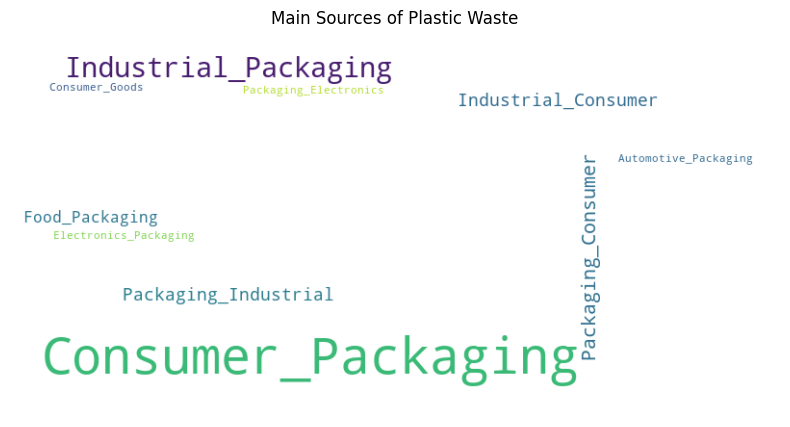

In [20]:
text = " ".join(waste_data["Main_Sources"].dropna())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Main Sources of Plastic Waste")
plt.show()


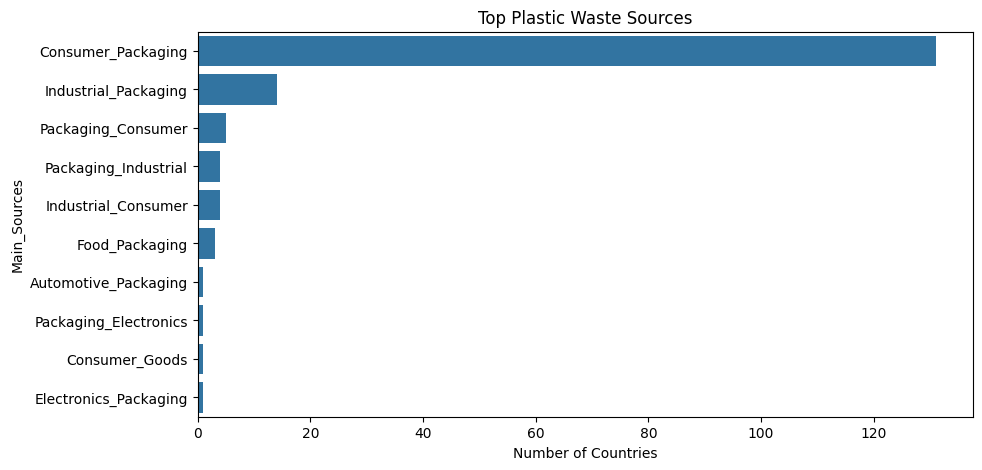

In [21]:
source_counts = waste_data["Main_Sources"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=source_counts.values,
    y=source_counts.index
)
plt.title("Top Plastic Waste Sources")
plt.xlabel("Number of Countries")
plt.show()


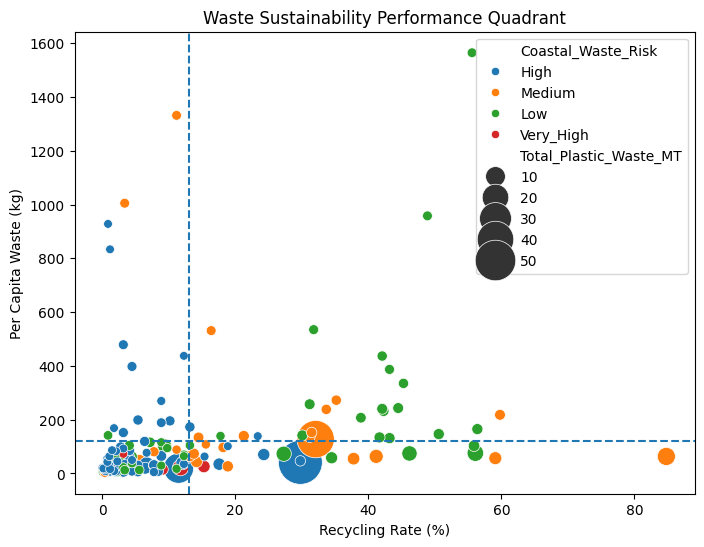

In [22]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=waste_data,
    x="Recycling_Rate",
    y="Per_Capita_Waste_KG",
    size="Total_Plastic_Waste_MT",
    hue="Coastal_Waste_Risk",
    sizes=(40,1000)
)

plt.axhline(y=waste_data["Per_Capita_Waste_KG"].mean(), ls="--")
plt.axvline(x=waste_data["Recycling_Rate"].mean(), ls="--")

plt.xlabel("Recycling Rate (%)")
plt.ylabel("Per Capita Waste (kg)")
plt.title("Waste Sustainability Performance Quadrant")
plt.show()


In [23]:
waste_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


In [24]:
# =====================
# IMPORT LIBRARIES
# =====================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = waste_data.copy()
# =====================
# DEFINE TARGET + FEATURES
# =====================

target = "Coastal_Waste_Risk"

numerical_features = [
    "Total_Plastic_Waste_MT",
    "Recycling_Rate",
    "Per_Capita_Waste_KG"
]

categorical_features = [
    "Main_Sources"
]

X = df[numerical_features + categorical_features]
y = df[target]

# =====================
# PREPROCESSING
# =====================

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# =====================
# MODEL
# =====================

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced" 
)

pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", model)
])

# =====================
# TRAIN / TEST SPLIT
# =====================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipeline.fit(X_train, y_train)

# =====================
# EVALUATION
# =====================

preds = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n")
print(classification_report(y_test, preds))

Accuracy: 0.636

Classification Report:

              precision    recall  f1-score   support

        High       0.72      0.87      0.79        15
         Low       0.56      0.45      0.50        11
      Medium       0.40      0.33      0.36         6
   Very_High       1.00      1.00      1.00         1

    accuracy                           0.64        33
   macro avg       0.67      0.66      0.66        33
weighted avg       0.62      0.64      0.62        33



Top Important Features:
                               Feature  Importance
0               Total_Plastic_Waste_MT    0.299738
1                       Recycling_Rate    0.248944
2                  Per_Capita_Waste_KG    0.248002
6          Main_Sources_Food_Packaging    0.092676
4      Main_Sources_Consumer_Packaging    0.061941
8    Main_Sources_Industrial_Packaging    0.019025
9      Main_Sources_Packaging_Consumer    0.009889
7     Main_Sources_Industrial_Consumer    0.006890
11   Main_Sources_Packaging_Industrial    0.005588
5   Main_Sources_Electronics_Packaging    0.003515


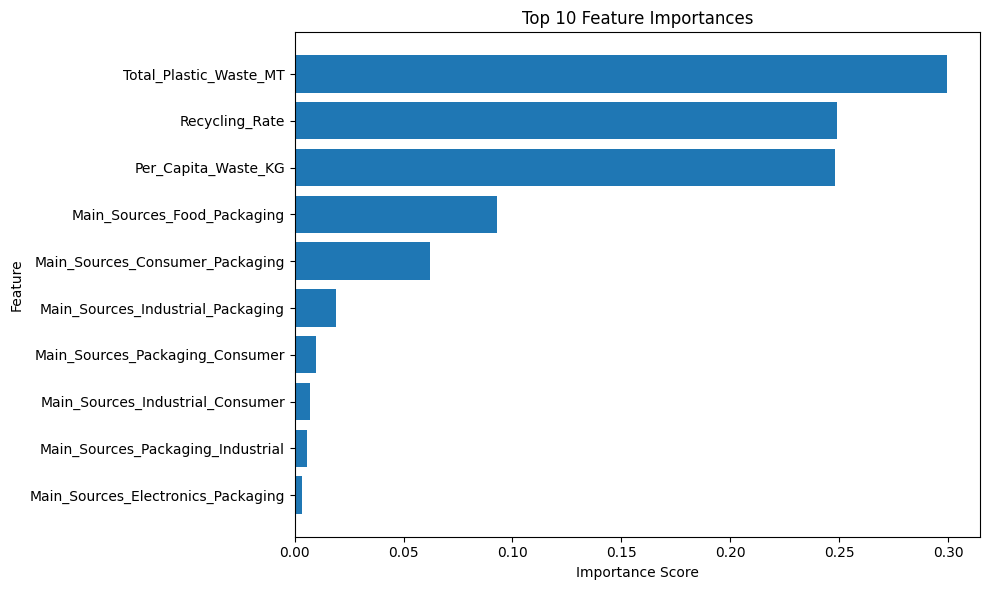

In [25]:
# Get numerical features (they remain unchanged)
num_features = numerical_features

# Get one-hot encoded category feature names
cat_features = pipeline.named_steps["prep"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(categorical_features)

# Combine all feature names
all_features = list(num_features) + list(cat_features)

# =====================
# EXTRACT FEATURE IMPORTANCE
# =====================

importances = pipeline.named_steps["model"].feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


print("Top Important Features:")
print(feature_importance_df.head(10))

# =====================
# VISUALIZE FEATURE IMPORTANCE
# =====================

plt.figure(figsize=(10,6))

plt.barh(
    feature_importance_df["Feature"][:10],
    feature_importance_df["Importance"][:10]
)

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()   # Highest importance on top
plt.tight_layout()
plt.show()